In [3]:
#%matplotlib qt
import copy 
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import scipy.spatial
from PIL import Image
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [4]:
def LoadData(dpath='English Alphabet', size=[64, 64]):
    images = []
    image_labels = []
    
    dirs = os.listdir(dpath)    
    c = len(dirs)
    
    for _dir in dirs:
        for file in glob.glob('English Alphabet\\' + _dir + '\\*.png'):
            images.append(np.ravel(np.array(  Image.open(file).convert('L')  )).astype(int))
            image_labels.append(int(_dir))
            
    images = np.array(images)
    image_labels = np.array(image_labels)
    
    #print(images)    
    #print(image_labels)
    #print(c)
    print(str(len(images)) + ' Images Loaded From ' + str(c) + ' Classes' )
    return images, image_labels, c

In [5]:
def to_bipolar(data):
    x = copy.deepcopy(data)    
    for i in range(0, x.shape[0]):
        for j in range(0, x.shape[1]):
            if x[i, j] == 255:
                x[i, j] = +1
            else:
                x[i, j] = -1
    
    print(str(x.shape[0]) + ' Images Converted To Bipolar' )
    return x

In [6]:
def split(x, y, testsize):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=testsize, random_state=20)
    
    m = X_train.shape[0]
    mtest = X_test.shape[0]
    
    print('Train & Test Data Splited With Rate : ' + str(int(testsize*100)) + ' %')
    return X_train, y_train, m, X_test, y_test, mtest

In [7]:
images_gray, image_labels, class_count = LoadData(dpath='English Alphabet', size=[64, 64])
images_bipolar = to_bipolar(images_gray)

# x_train, y_train, m_train, x_test, y_test, m_test = split(images_bipolar, image_labels, testsize=0.20)

520 Images Loaded From 26 Classes
520 Images Converted To Bipolar


Train & Test Data Splited With Rate : 20 %
Train mse : 3.6859175711612124e-09
Train acc : 1.0
Test  acc : 0.9326923076923077


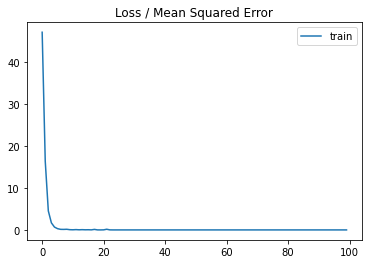

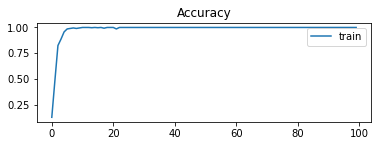

In [14]:
# Part B

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

# Split Data
x_train, y_train, m_train, x_test, y_test, m_test = split(images_gray, image_labels, testsize=0.20)

# OneHot Encoding
ohe = OneHotEncoder()
y_train_onehot = ohe.fit_transform(np.asmatrix(y_train).T).toarray()
y_test_onehot = ohe.fit_transform(np.asmatrix(y_test).T).toarray()

#################################################################  
# # define model
# model = Sequential()
# model.add(Dense(26, input_dim=3600, activation='softmax', kernel_initializer='zeros'))
# model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.5), metrics=['accuracy'])
# # fit model
# history = model.fit(x_train, y_train_onehot, epochs=100, verbose=0)
################################
# define model
model = Sequential()
model.add(Dense(26, input_dim=3600, activation='sigmoid', kernel_initializer='zeros'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(x_train, y_train_onehot, epochs=100, verbose=0)
#################################################################

# Prediction
y_pred_onehot = model.predict(x_test)

# evaluate the model
train_mse, train_acc = model.evaluate(x_train, y_train_onehot, verbose=0)

test_acc = accuracy_score(np.argmax(y_pred_onehot, axis=1), np.argmax(y_test_onehot, axis=1))

# Report Results
print('Train mse :', train_mse)
print('Train acc :', train_acc)
print('Test  acc :', test_acc)
# print('y_pred:', np.argmax(y_test_onehot, axis=1))
# print('y_pred:', np.argmax(y_pred_onehot, axis=1))

# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [ ]:
# Part A

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras import activations
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

# Split Data
x_train, y_train, m_train, x_test, y_test, m_test = split(images_bipolar, image_labels, testsize=0.20)

# OneHot Encoding
ohe = OneHotEncoder()
y_train_onehot = ohe.fit_transform(np.asmatrix(y_train).T).toarray()
y_train_onehot = np.where(y_train_onehot > 0, 1, -1)
y_test_onehot = ohe.fit_transform(np.asmatrix(y_test).T).toarray()
y_test_onehot = np.where(y_test_onehot > 0, 1, -1)

from keras import backend as k
def sign_active_function(x):
    return k.sign(x)


#################################################################  
# define model
model = Sequential()
model.add(Dense(26, input_dim=3600, activation='tanh', kernel_initializer='zeros'))
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])
# fit model
history = model.fit(x_train, y_train_onehot, epochs=100, verbose=0)
################################
# # define model
# model = Sequential()
# model.add(Dense(26, input_dim=3600, activation='softmax', kernel_initializer='zeros'))
# model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.5), metrics=['accuracy'])
# # fit model
# history = model.fit(x_train, y_train_onehot, epochs=100, verbose=0)
#################################################################

# Prediction
y_pred_onehot = model.predict(x_test)

print(y_test_onehot[0])
print(y_pred_onehot[0])
print(np.argmax(y_test_onehot[0]))
print(np.argmax(y_pred_onehot[0]))

# evaluate the model
train_mse, train_acc = model.evaluate(x_train, y_train_onehot, verbose=0)

test_acc = accuracy_score(np.argmax(y_pred_onehot, axis=1), np.argmax(y_test_onehot, axis=1))

# Report Results
print('Train mse :', train_mse)
print('Train acc :', train_acc)
print('Test  acc :', test_acc)
# print('y_pred:', np.argmax(y_test_onehot, axis=1))
# print('y_pred:', np.argmax(y_pred_onehot, axis=1))

# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()